## A-Z Handwritten Alphabets (CNN)
In this notebook, we will explore this dataset that we got from kaggle [Dataset Link](https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format) and build CNN model.

## EDA And Visualization

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../A_Z Handwritten Data.csv')

In [6]:
df.head(3)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Specifying column names.
column_names = ['Label']
for i in range(1, 785):
    column_names.append(f'Pixel_{i}')
df.columns = column_names
df.head()

,Label,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
X = df.drop(['Label'], axis=1)
Y = df['Label']

In [97]:
print(f'X Shape = {X.shape}\nY Shape = {Y.shape}')

X Shape = (372450, 784)
Y Shape = (372450,)


In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [99]:
Y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

Alphabets are encoded => 0:'A' to 25:'Z'

<AxesSubplot:>

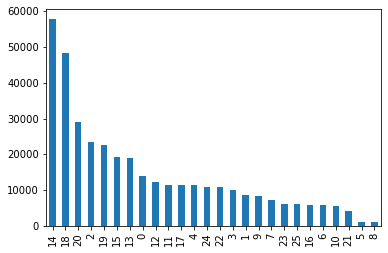

In [100]:
Y.value_counts().plot(kind='bar')

In [102]:
X = X.astype('float32').reshape(X.shape[0], 28, 28)
X.shape

(372450, 28, 28)

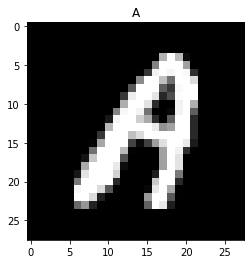

In [103]:
# Visualizing one example only.

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap='gray')
plt.title('A')
plt.show()

In [104]:
# Scaling the input features for ANN.
X = X.reshape(-1, 28, 28, 1)
X.shape

(372450, 28, 28, 1)

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(f'x_train shape = {x_train.shape}\nx_test shape = {x_test.shape}\ny_train shape = {y_train.shape}\ny_test shape = {y_test.shape}')

x_train shape = (260715, 28, 28, 1)
x_test shape = (111735, 28, 28, 1)
y_train shape = (260715,)
y_test shape = (111735,)


## Building CNN

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [109]:
model = Sequential()

model.add(Conv2D(
            filters=32,
            kernel_size=(3,3),
            activation='relu', 
            input_shape=[28,28,1]
         ))
model.add(Conv2D(
            filters=64,
            kernel_size=(3,3),
            activation='relu'
         ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_49 (Dense)             (None, 26)                3354      
Total params: 1,201,946
Trainable params: 1,201,946
Non-trainable params: 0
___________________________________________

In [111]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
2037/2037 [==============================] - 156s 76ms/step - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.0351 - val_accuracy: 0.9918
Epoch 2/5
2037/2037 [==============================] - 155s 76ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.0377 - val_accuracy: 0.9922
Epoch 3/5
2037/2037 [==============================] - 155s 76ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0392 - val_accuracy: 0.9927
Epoch 4/5
2037/2037 [==============================] - 155s 76ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0406 - val_accuracy: 0.9932
Epoch 5/5
2037/2037 [==============================] - 155s 76ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0403 - val_accuracy: 0.9930


In [112]:
testing_result = model.evaluate(x_test, y_test)
print(testing_result)

3492/3492 [==============================] - 20s 6ms/step - loss: 0.0403 - accuracy: 0.9930
[0.04028718173503876, 0.9930281639099121]


The accuracies are amazing. Let us save the model.

## Saving The Model

In [113]:
model.save('alphabets_cnn.h5')